<a href="https://colab.research.google.com/github/shrijareddy/Optimising-Agriculture-Production/blob/main/Optimising_Agriculture_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
print("shape of the dataset:" ,data.shape)

shape of the dataset: (2200, 8)


In [5]:
#checking if there are any null values, if there are any replace them with mean(numerical), median, mode(categorical).
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# what all crops are there
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
# summary of the crops

print("average ratio of nitrogen in soil: {0:.2f}".format(data['N'].mean()))
print("average ratio of phosphorus in soil: {0:.2f}".format(data['P'].mean()))
print("average ratio of potassium in soil: {0:.2f}".format(data['K'].mean()))
print("average Temperature in celcius: {0:.2f}".format(data['temperature'].mean()))
print("average relative humidity in %: {0:.2f}".format(data['humidity'].mean()))
print("average PH value of soil: {0:.2f}".format(data['ph'].mean()))
print("average rainfall in nm: {0:.2f}".format(data['rainfall'].mean()))

average ratio of nitrogen in soil: 50.55
average ratio of phosphorus in soil: 53.36
average ratio of potassium in soil: 48.15
average Temperature in celcius: 25.62
average relative humidity in %: 71.48
average PH value of soil: 6.47
average rainfall in nm: 103.46


In [15]:
def summary(crops = list(data['label'].value_counts().index)):
  x = data[data['label'] == crops]

In [16]:
# lets see more details

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("crops which require greater than average", conditions, ': \n')
  print(data[data[conditions] > data[conditions].mean()]['label'].unique())
  print('\n')
  #print("------------------------------------------------------------------")

  print("crops which require less than average", conditions, ': \n')
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [27]:
from sklearn.cluster import KMeans

x = data.drop(['label'], axis = 1)

x=x.values

print(x.shape)

(2200, 7)


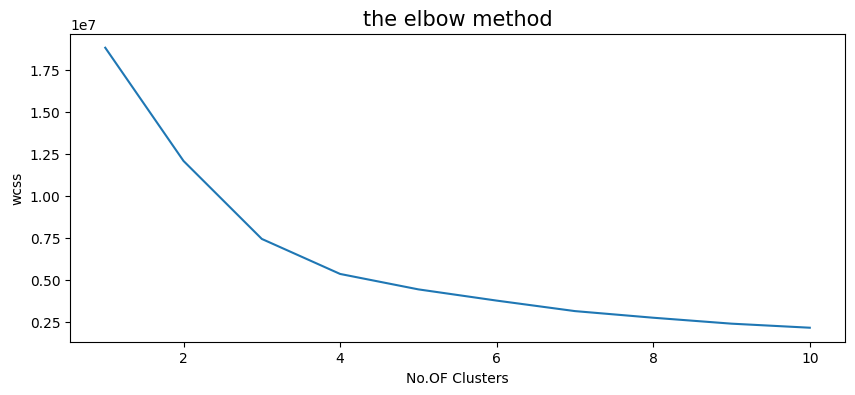

In [28]:
# to determine optimum number of clusters within the dataset using elbow method

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

#plotting results
plt.plot(range(1,11), wcss)
plt.title('the elbow method', fontsize=15)
plt.xlabel('No.OF Clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [29]:
#split the data into train and test

from sklearn.model_selection import train_test_split
y = data['label']
x = data.drop(['label'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [30]:
#making a predictive model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


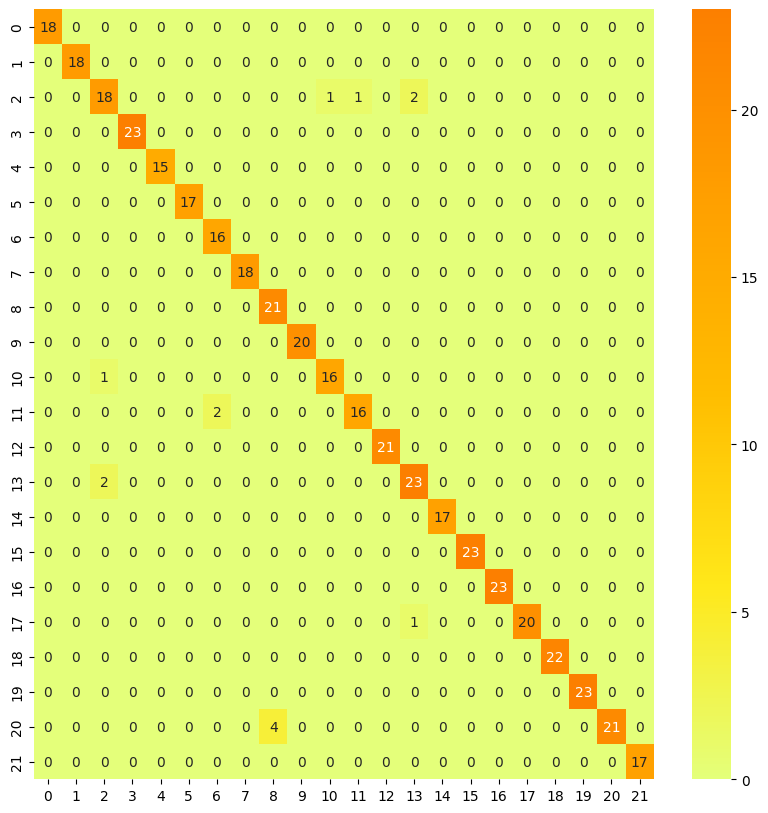

In [31]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True , cmap = 'Wistia')
plt.show()

In [34]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [35]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))

print("The suggested crop for the given climate conditions is:", prediction)

The suggested crop for the given climate conditions is: ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
